In [4]:
##Importing modules
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
import pickle
import tensorflow as tf

In [5]:
## Loading the data set
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## removing unnecessary columns ['Rownumber', 'CustomerId', 'Surname']

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## CHecking number of geaographic locations
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
## Encoding categorical feature Gender

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
##Encoding categorical feature Geography using one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
encoded_geography = onehot_encoder.fit_transform(data[['Geography']])
encoded_geography
encoded_geography.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [10]:
geo_encoded_df = pd.DataFrame(encoded_geography.toarray(), columns=onehot_encoder.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [11]:
#Combining` the encoded geography columns with the original dataframe
data = pd.concat([data, geo_encoded_df], axis=1)
data = data.drop('Geography', axis=1)
data


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [12]:
#Saving Encoders for future use
with open('label_encoder_gender.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
with open('onehot_encoder_geography.pkl', 'wb') as f:
    pickle.dump(onehot_encoder, f)

In [13]:
#removing any duplicate columns if present
data = data.loc[:, ~data.columns.duplicated()]
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [14]:
#Devideding the data into features and target
X = data.drop('Exited', axis=1)
Y = data['Exited']

In [15]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
#Saving scaler in a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [18]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
dtypes: float64(5), int32(1), int64(7)
memory usage: 976.7 KB


### Training An ANN

In [20]:
#importing models to train an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam    
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard


In [21]:
(X_train.shape[1], )

(12,)

In [22]:
#Building the ANN model
model = Sequential(
    [
        Dense(64,activation = 'relu', input_shape=(X_train.shape[1],)),#First hidden layer connected with input layer
        Dense(32,activation = 'relu'),#Second hidden layer
        Dense(1,activation = 'sigmoid')#Output layer
    ]
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)               

In [24]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
## Set up tensorboard 
from datetime import datetime
log_dir = "logs/fit/" +datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [26]:
## Setting up Early Stopping and TensorBoard Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [27]:
## Training the model
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping, tensorboard_callback])

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 0.4471 - accuracy: 0.8064 - val_loss: 0.3957 - val_accuracy: 0.8255
Epoch 2/100
250/250 [==============================] - 2s 5ms/step - loss: 0.4471 - accuracy: 0.8064 - val_loss: 0.3957 - val_accuracy: 0.8255
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8406 - val_loss: 0.3588 - val_accuracy: 0.8530
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8406 - val_loss: 0.3588 - val_accuracy: 0.8530
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8518 - val_loss: 0.3467 - val_accuracy: 0.8560
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8518 - val_loss: 0.3467 - val_accuracy: 0.8560
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8575 - val_loss: 0.3477 - val_accuracy: 0.8555

In [28]:
model.save('customer_churn_model.h5')

In [29]:
##Load Tensorboard in Extension 
%load_ext tensorboard

In [30]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 5268), started 2 days, 2:19:19 ago. (Use '!kill 5268' to kill it.)

In [31]:
# Model Evaluation and Accuracy Assessment
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("🔍 Evaluating Model Performance...")
print("=" * 50)

🔍 Evaluating Model Performance...


In [33]:
# 1. Basic Accuracy Metrics
# Make predictions on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate accuracy metrics
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Test Set Performance:")
print(f"   Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"   Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"   F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print()

# Training set accuracy for comparison
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"📈 Training Set Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"📉 Training Set Loss:     {train_loss:.4f}")
print()

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:
    print("⚠️  Warning: Possible overfitting detected!")
    print(f"   Training accuracy is {((train_accuracy - test_accuracy)*100):.2f}% higher than test accuracy")
else:
    print("✅ Good generalization - No significant overfitting detected")

63/63 [==============================] - 0s 3ms/step
📊 Test Set Performance:📊 Test Set Performance:
   Accuracy:  0.8595 (85.95%)
   Precision: 0.7205 (72.05%)
   Recall:    0.4656 (46.56%)
   F1-Score:  0.5657 (56.57%)


   Accuracy:  0.8595 (85.95%)
   Precision: 0.7205 (72.05%)
   Recall:    0.4656 (46.56%)
   F1-Score:  0.5657 (56.57%)

📈 Training Set Accuracy: 0.8734 (87.34%)
📉 Training Set Loss:     0.3062

✅ Good generalization - No significant overfitting detected
📈 Training Set Accuracy: 0.8734 (87.34%)
📉 Training Set Loss:     0.3062

✅ Good generalization - No significant overfitting detected


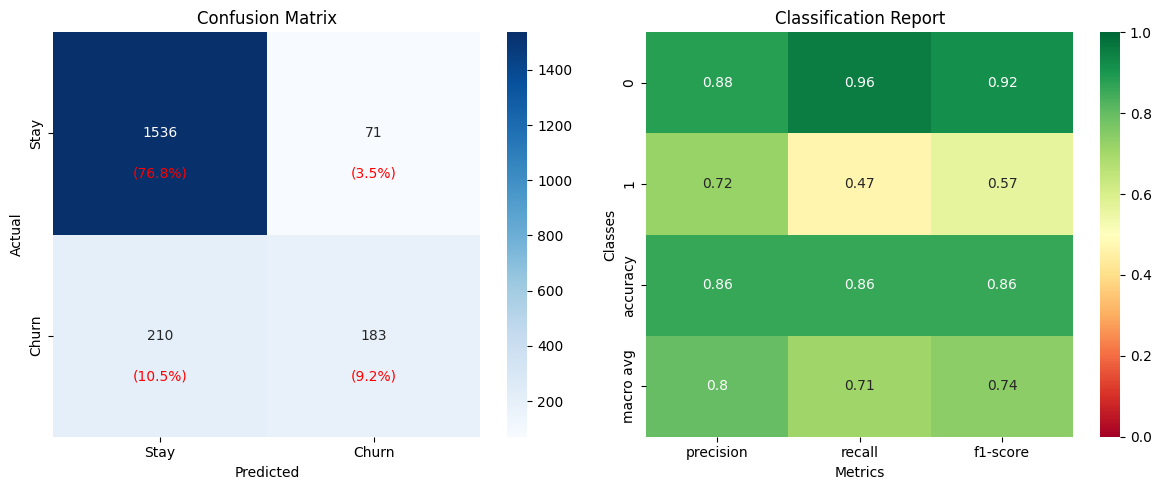


📋 Confusion Matrix Analysis:
   True Negatives (Correctly predicted Stay):  1536
   False Positives (Incorrectly predicted Churn): 71
   False Negatives (Missed Churn): 210
   True Positives (Correctly predicted Churn): 183

   Specificity (True Negative Rate): 0.9558
   Sensitivity (True Positive Rate): 0.4656
   False Positive Rate: 0.0442
   False Negative Rate: 0.5344


In [34]:
# 2. Confusion Matrix Visualization
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stay', 'Churn'], 
            yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add percentage annotations
total = cm.sum()
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.7, f'({cm[i,j]/total*100:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

# Classification Report Heatmap
plt.subplot(1, 2, 2)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :-1].T
sns.heatmap(report_df, annot=True, cmap='RdYlGn', vmin=0, vmax=1)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

plt.tight_layout()
plt.show()

# Print detailed confusion matrix analysis
tn, fp, fn, tp = cm.ravel()
print("\n📋 Confusion Matrix Analysis:")
print(f"   True Negatives (Correctly predicted Stay):  {tn}")
print(f"   False Positives (Incorrectly predicted Churn): {fp}")
print(f"   False Negatives (Missed Churn): {fn}")
print(f"   True Positives (Correctly predicted Churn): {tp}")
print()
print(f"   Specificity (True Negative Rate): {tn/(tn+fp):.4f}")
print(f"   Sensitivity (True Positive Rate): {tp/(tp+fn):.4f}")
print(f"   False Positive Rate: {fp/(fp+tn):.4f}")
print(f"   False Negative Rate: {fn/(fn+tp):.4f}")

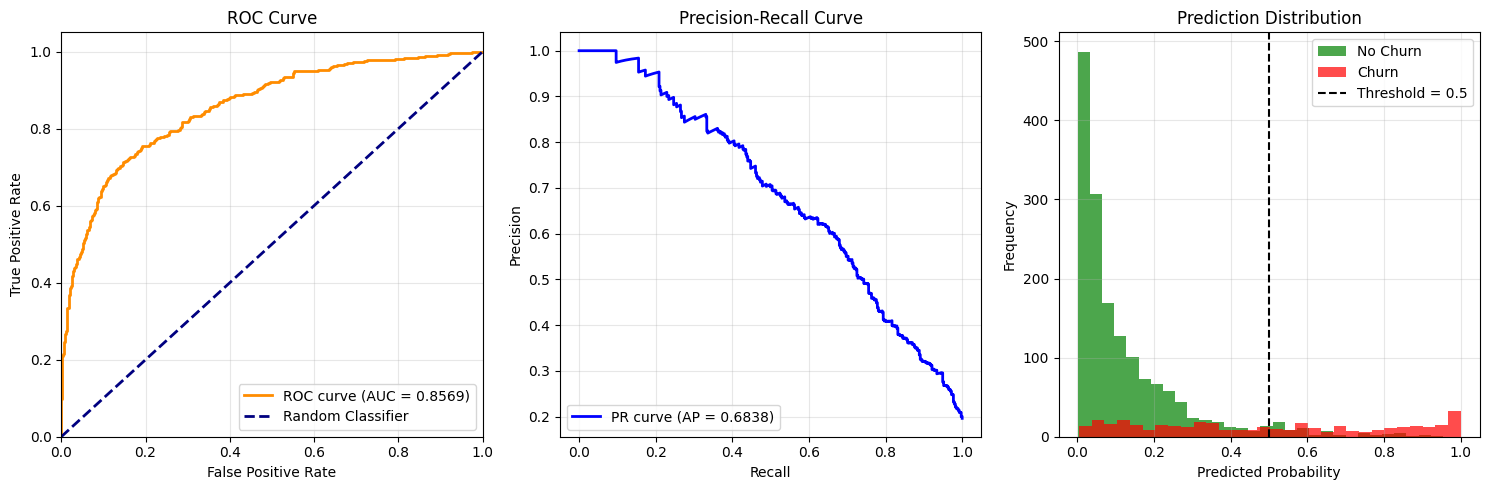


🎯 Advanced Metrics:
   AUC-ROC Score: 0.8569
   Average Precision Score: 0.6838
   AUC-ROC Interpretation:
      Good model performance! 👍


In [35]:
# 3. ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.subplot(1, 3, 2)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall_vals, precision_vals, color='blue', lw=2, 
         label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

# Prediction Distribution
plt.subplot(1, 3, 3)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='No Churn', color='green')
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Churn', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Prediction Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 Advanced Metrics:")
print(f"   AUC-ROC Score: {roc_auc:.4f}")
print(f"   Average Precision Score: {avg_precision:.4f}")
print(f"   AUC-ROC Interpretation:")
if roc_auc >= 0.9:
    print(f"      Excellent model performance! 🌟")
elif roc_auc >= 0.8:
    print(f"      Good model performance! 👍")
elif roc_auc >= 0.7:
    print(f"      Fair model performance 👌")
else:
    print(f"      Poor model performance 👎")

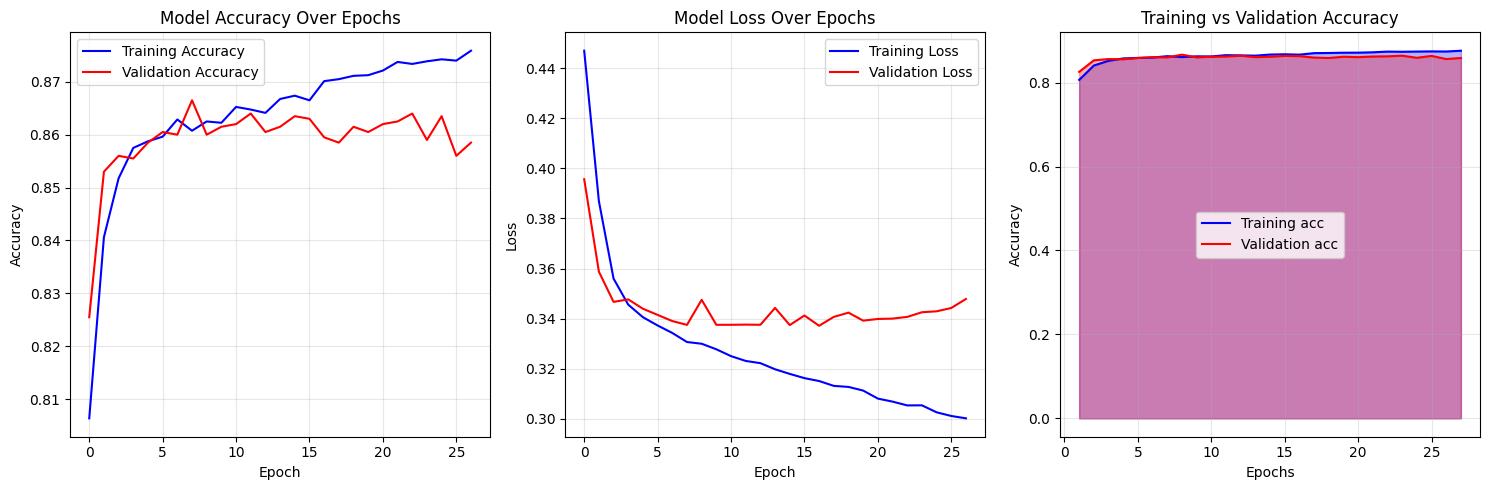


📈 Training History Summary:
   Total Epochs Trained: 27
   Final Training Accuracy: 0.8759 (87.59%)
   Final Validation Accuracy: 0.8585 (85.85%)
   Final Training Loss: 0.3001
   Final Validation Loss: 0.3478
   Best Validation Accuracy: 0.8665
   Best Validation Loss: 0.3371


In [36]:
# 4. Training History Visualization
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot training & validation loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning curve
plt.subplot(1, 3, 3)
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation acc')
plt.fill_between(epochs, history.history['accuracy'], alpha=0.3, color='blue')
plt.fill_between(epochs, history.history['val_accuracy'], alpha=0.3, color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training statistics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
epochs_trained = len(history.history['accuracy'])

print(f"\n📈 Training History Summary:")
print(f"   Total Epochs Trained: {epochs_trained}")
print(f"   Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"   Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"   Final Training Loss: {final_train_loss:.4f}")
print(f"   Final Validation Loss: {final_val_loss:.4f}")
print(f"   Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"   Best Validation Loss: {min(history.history['val_loss']):.4f}")

🔍 Analyzing Feature Importance...
This may take a moment...

16/16 [==============================] - 0s 1ms/step


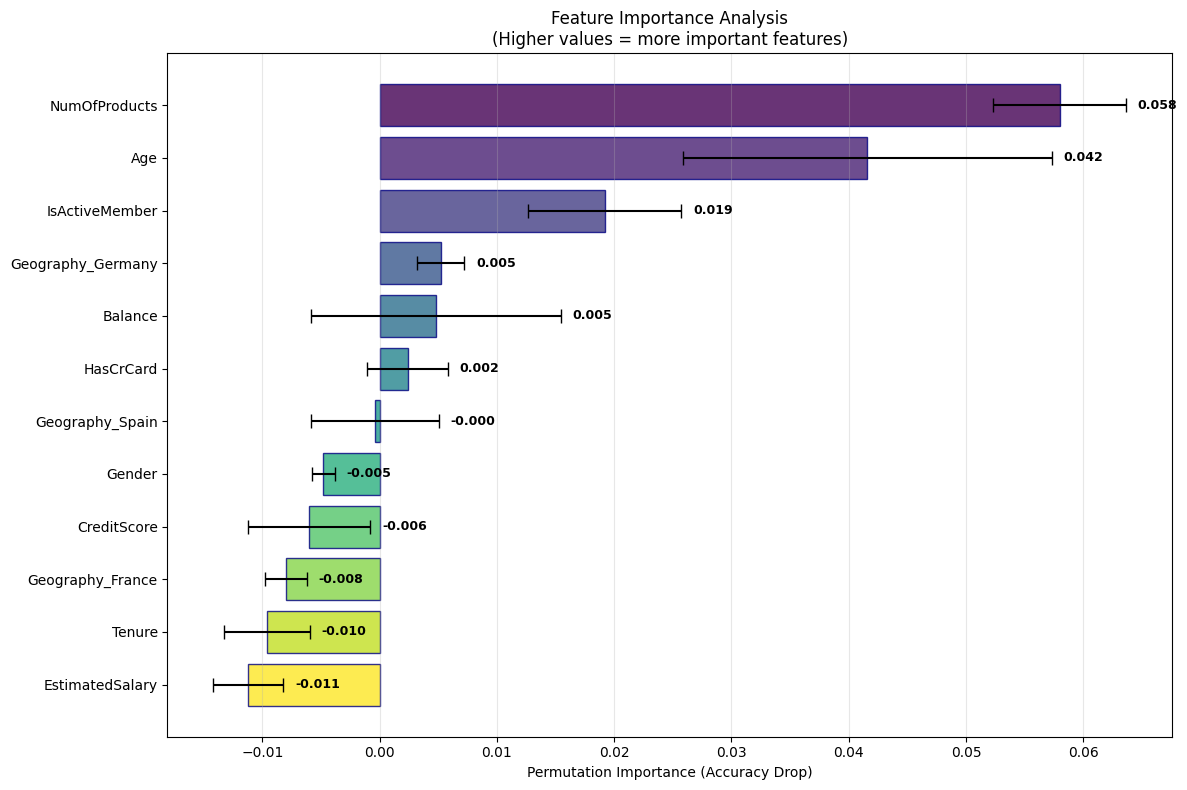

📊 Feature Importance Ranking:
    1. 🔥 NumOfProducts            : 0.0580 (±0.0057)
    2. 🔥 Age                      : 0.0416 (±0.0157)
    3. 🔥 IsActiveMember           : 0.0192 (±0.0065)
    4. ⭐ Geography_Germany        : 0.0052 (±0.0020)
    5. 📊 Balance                  : 0.0048 (±0.0106)
    6. 📊 HasCrCard                : 0.0024 (±0.0034)
    7. 📊 Geography_Spain          : -0.0004 (±0.0054)
    8. 📊 Gender                   : -0.0048 (±0.0010)
    9. 📊 CreditScore              : -0.0060 (±0.0052)
   10. 📊 Geography_France         : -0.0080 (±0.0018)
   11. 📊 Tenure                   : -0.0096 (±0.0037)
   12. 📊 EstimatedSalary          : -0.0112 (±0.0030)

🎯 Top 3 Most Important Features:
   1. NumOfProducts - Impact: 0.0580
   2. Age - Impact: 0.0416
   3. IsActiveMember - Impact: 0.0192

💡 Feature Importance Insights:
   • Most critical feature: NumOfProducts (0.0580)
   • Features with significant impact (>0.005): 4
   • Features with minimal impact (<0.001): 6


In [39]:
# 5. Feature Importance Analysis (Alternative approach)
import numpy as np
from sklearn.base import BaseEstimator

# Create a wrapper class for the Keras model to work with sklearn
class KerasModelWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        # This is a dummy fit method since our model is already trained
        return self
    
    def predict(self, X):
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).flatten()
    
    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

# Get feature names after preprocessing
feature_names = X.columns.tolist()

print("🔍 Analyzing Feature Importance...")
print("This may take a moment...\n")

# Create wrapper
model_wrapper = KerasModelWrapper(model)

# Use a subset for faster computation
X_test_subset = X_test[:500]  # Reduced size for faster computation
y_test_subset = y_test.iloc[:500]

# Calculate permutation importance using the wrapper
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    model_wrapper, X_test_subset, y_test_subset, 
    n_repeats=5, random_state=42, scoring='accuracy'
)

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = plt.barh(range(len(importance_df)), importance_df['importance'], 
                xerr=importance_df['std'], capsize=5, color=colors, edgecolor='navy', alpha=0.8)
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Permutation Importance (Accuracy Drop)')
plt.title('Feature Importance Analysis\n(Higher values = more important features)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (importance, std) in enumerate(zip(importance_df['importance'], importance_df['std'])):
    plt.text(importance + std + 0.001, i, f'{importance:.3f}', 
             va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Feature Importance Ranking:")
for i, (_, row) in enumerate(importance_df.iterrows()):
    impact_level = "🔥" if row['importance'] > 0.01 else "⭐" if row['importance'] > 0.005 else "📊"
    print(f"   {i+1:2d}. {impact_level} {row['feature']:25s}: {row['importance']:.4f} (±{row['std']:.4f})")
    
print(f"\n🎯 Top 3 Most Important Features:")
top_features = importance_df.head(3)
for i, (_, row) in enumerate(top_features.iterrows()):
    print(f"   {i+1}. {row['feature']} - Impact: {row['importance']:.4f}")
    
print(f"\n💡 Feature Importance Insights:")
most_important = importance_df.iloc[0]
print(f"   • Most critical feature: {most_important['feature']} ({most_important['importance']:.4f})")
print(f"   • Features with significant impact (>0.005): {len(importance_df[importance_df['importance'] > 0.005])}")
print(f"   • Features with minimal impact (<0.001): {len(importance_df[importance_df['importance'] < 0.001])}")

In [41]:
# 6. Model Performance Summary and Business Insights
print("=" * 70)
print("🎯 FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 70)

# Calculate business metrics
total_customers = len(y_test)
actual_churners = y_test.sum()
predicted_churners = y_pred.sum()
correctly_identified_churners = tp
missed_churners = fn

print(f"\n📈 MODEL ACCURACY METRICS:")
print(f"   Overall Accuracy:        {test_accuracy:.1%}")
print(f"   Precision (Churn):       {precision:.1%}")
print(f"   Recall (Churn):          {recall:.1%}")
print(f"   F1-Score:                {f1:.1%}")
print(f"   AUC-ROC Score:           {roc_auc:.4f}")

print(f"\n💼 BUSINESS IMPACT ANALYSIS:")
print(f"   Total Test Customers:           {total_customers:,}")
print(f"   Actual Churners:                {actual_churners:,} ({actual_churners/total_customers:.1%})")
print(f"   Predicted Churners:             {predicted_churners:,} ({predicted_churners/total_customers:.1%})")
print(f"   Correctly Identified Churners:  {correctly_identified_churners:,}")
print(f"   Missed Churners:                {missed_churners:,}")
print(f"   False Alarms:                   {fp:,}")

# Cost-benefit analysis (example values)
cost_of_intervention = 50  # Cost to retain a customer
value_of_customer = 500    # Value of retaining a customer
cost_of_churn = value_of_customer  # Cost of losing a customer

savings_from_correct_predictions = tp * (value_of_customer - cost_of_intervention)
cost_of_missed_churners = fn * cost_of_churn
cost_of_false_alarms = fp * cost_of_intervention

net_value = savings_from_correct_predictions - cost_of_missed_churners - cost_of_false_alarms

print(f"\n💰 ESTIMATED BUSINESS VALUE (Example Calculation):")
print(f"   Savings from Correct Predictions: ${savings_from_correct_predictions:,}")
print(f"   Cost of Missed Churners:         ${cost_of_missed_churners:,}")
print(f"   Cost of False Alarms:            ${cost_of_false_alarms:,}")
print(f"   Net Business Value:              ${net_value:,}")

print(f"\n🎯 MODEL RECOMMENDATIONS:")
if test_accuracy >= 0.85:
    print("   ✅ EXCELLENT: Model is ready for production deployment")
elif test_accuracy >= 0.80:
    print("   ✅ GOOD: Model performs well, consider minor improvements")
elif test_accuracy >= 0.75:
    print("   ⚠️  FAIR: Model needs improvement before deployment")
else:
    print("   ❌ POOR: Model requires significant improvement")

if recall >= 0.80:
    print("   ✅ Good at identifying actual churners")
else:
    print("   ⚠️  Missing too many actual churners - consider adjusting threshold")

if precision >= 0.70:
    print("   ✅ Low false alarm rate")
else:
    print("   ⚠️  High false alarm rate - may waste intervention resources")

print("=" * 70)

🎯 FINAL MODEL PERFORMANCE SUMMARY

📈 MODEL ACCURACY METRICS:
   Overall Accuracy:        86.0%
   Precision (Churn):       72.0%
   Recall (Churn):          46.6%
   F1-Score:                56.6%
   AUC-ROC Score:           0.8569

💼 BUSINESS IMPACT ANALYSIS:
   Total Test Customers:           2,000
   Actual Churners:                393 (19.7%)
   Predicted Churners:             254 (12.7%)
   Correctly Identified Churners:  183
   Missed Churners:                210
   False Alarms:                   71

💰 ESTIMATED BUSINESS VALUE (Example Calculation):
   Savings from Correct Predictions: $82,350
   Cost of Missed Churners:         $105,000
   Cost of False Alarms:            $3,550
   Net Business Value:              $-26,200

🎯 MODEL RECOMMENDATIONS:
   ✅ EXCELLENT: Model is ready for production deployment
   ⚠️  Missing too many actual churners - consider adjusting threshold
   ✅ Low false alarm rate
